# Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#------------------------------

import matplotlib.pyplot as plt

myparams = {
    'text.usetex': True,
    'text.latex.preamble': '\\usepackage{amsfonts}',
    'text.latex.preamble': '\\usepackage[utf8]{inputenc}',
    'text.latex.preamble': '\\usepackage[russian]{babel}',
    'font.family': 'Djvu Serif',
    'font.size': 14,
    'axes.grid': False,
    'grid.alpha': 0.1,
    'lines.linewidth': 2
}

plt.rcParams.update(myparams)

#------------------------------

%load_ext autoreload
%autoreload 2

c:\Users\kisnikser\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\kisnikser\AppData\Local\Temp\ipykernel_388\419197391.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Анализ испытуемых

In [2]:
path = os.path.join(os.path.dirname(os.getcwd()), 'src', 'ds003688-download', 'participants.tsv')
participants = pd.read_csv(path, sep='\t')
participants[participants['fMRI'] == 'yes']

,participant_id,sex,age,handedness,language_dominance,language_dominance_technique,iEEG,fMRI,iEEG_hemisphere,high_density_grid
3,sub-04,M,11,R,possibly L,fMRI,no,yes,NaN,NaN
6,sub-07,F,42,R,L,fMRI,yes,yes,L,no
7,sub-08,M,17,R,L,fTCD + fMRI,no,yes,NaN,NaN
8,sub-09,F,33,R,L,fTCD,yes,yes,L,no
10,sub-11,F,9,NaN,NaN,NaN,no,yes,NaN,NaN
12,sub-13,F,17,L,R,Wada,yes,yes,R,no
13,sub-14,F,18,R,R,Wada,yes,yes,L,yes
14,sub-15,M,14,R,L,fMRI,no,yes,NaN,NaN
15,sub-16,M,17,R,L,Wada,yes,yes,L,no
17,sub-18,F,15,R,L,fMRI,yes,yes,L,no


# Подключение моделей

In [3]:
# видеоряд
from dataloader import FramesLoader
framesloader = FramesLoader()
vector_list = framesloader.get_vector_list(load=True, new=False)
vector_list_new = framesloader.get_vector_list(load=True, new=True)

# снимки фМРТ
from dataloader import Sub

# модели
from models import LinearModel, LinearDeltaModel

# визуализатор
from visualizer import Visualizer

# вспомогательные функции
import utils

# Демонстрация работы метода

In [4]:
sub = Sub('04')
lindelta_new = LinearDeltaModel(vector_list_new, sub, 5, 1, 1000)
lindelta_new.fit()
lindelta_new.predict()
lindelta_new.evaluate()

In [5]:
lindelta_new.MSE_test

0.0001089334671777331

In [6]:
visualizer_new = Visualizer(lindelta_new)

TEST


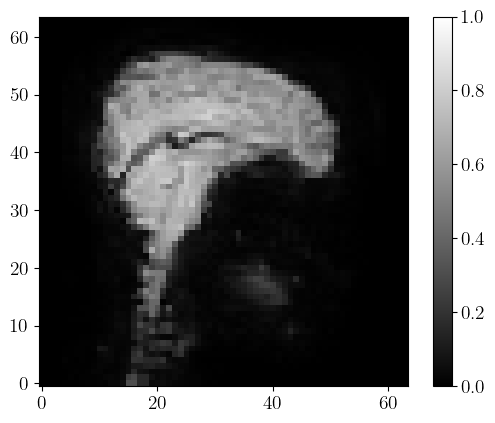

PREDICTED


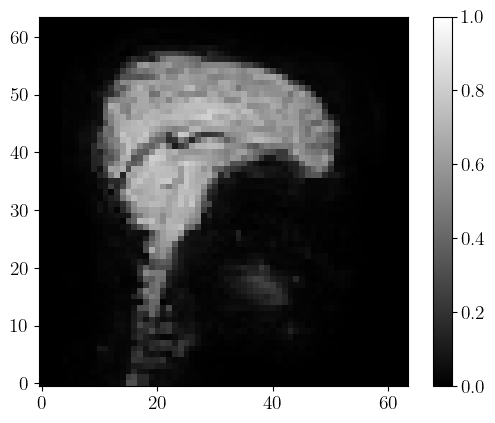

DIFFERENCE


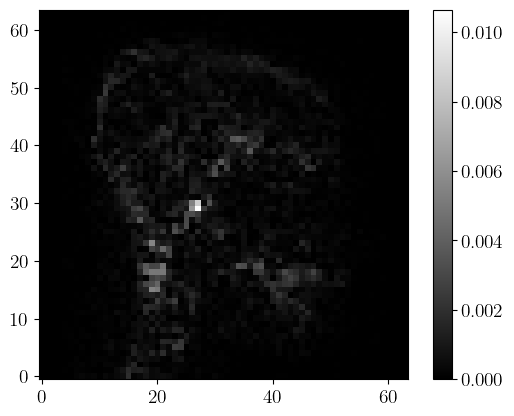

In [7]:
visualizer_new.show_scan_slices(37, 0, 20)

In [8]:
sub = Sub('04')
lindelta = LinearDeltaModel(vector_list, sub, 5, 1, 1000)
lindelta.fit()
lindelta.predict()
lindelta.evaluate()

In [9]:
lindelta.MSE_test

0.0001087134084543104

In [10]:
visualizer = Visualizer(lindelta)

TEST


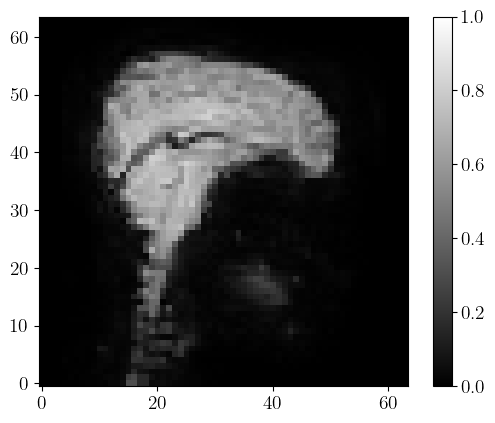

PREDICTED


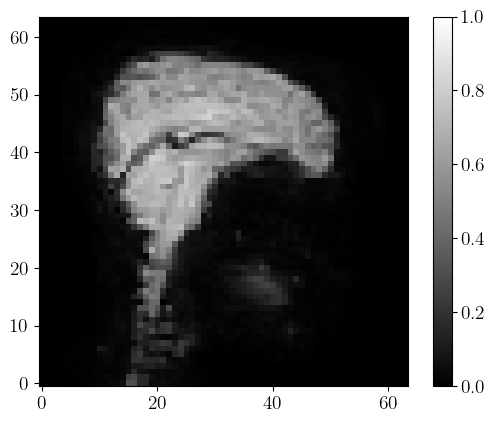

DIFFERENCE


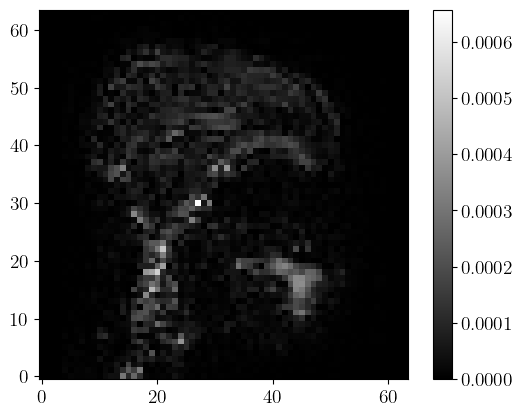

In [11]:
visualizer.show_scan_slices(37, 0, 20)

# Анализ времени задержки

In [ ]:
sub = Sub('47')
lindelta = LinearDeltaModel(vector_list, sub, 5, 1, 1000)
lindelta.fit()
lindelta.predict()
lindelta.evaluate()

In [ ]:
delta_voxels = abs(lindelta.deltaY_train).sum(axis=1)

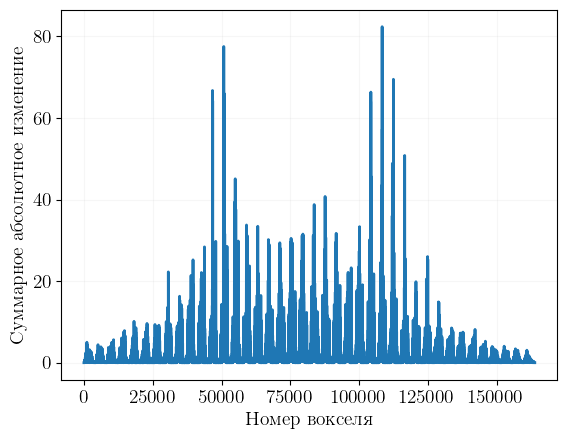

In [ ]:
plt.plot(delta_voxels)
plt.xlabel('Номер вокселя')
plt.ylabel('Суммарное абсолютное изменение')
plt.grid(alpha=0.1)
plt.show()

Можно по-разному выбирать границу отсечения:
- 1/2 максимального значения
- конкретное число, например, 10
- такое число, что, например, ровно 1/4 вокселей будет попадать в область (по сути, 0.75-квантиль)

In [ ]:
d1, d2, d3 = lindelta._d1, lindelta._d2, lindelta._d3
mask1 = np.ones((d1, d2, d3))
mask1.T[:d3//3, :, :] = 0
mask1.T[:, d2//3:, :] = 0
mask1 = mask1.reshape(d1*d2*d3)

In [ ]:
#bound = (delta_voxels * mask1).max() / 2
#bound

In [ ]:
#bound = 7

In [ ]:
array = delta_voxels * mask1
array[array > 0]

array([0.10018163, 0.085496  , 0.09221022, ..., 0.24197266, 0.20875171,
       0.25631957])

In [ ]:
bound = np.quantile(array[array>0], 1 - 1/32)
bound

5.894088893621295

In [ ]:
mask = array > bound
difference = lindelta.Y_test_predicted - np.delete(lindelta.Y_test, 0, 1)
MSE_test_corrected = utils.MSE(difference[np.nonzero(mask)])
d1, d2, d3 = lindelta._d1, lindelta._d2, lindelta._d3
mask = mask.reshape((d1, d2, d3))

In [ ]:
print(f"MSE: {lindelta.MSE_test:.4f}")
print(f"MSE corrected: {MSE_test_corrected:.4f}")

MSE: 0.0001
MSE corrected: 0.0004


Посмотрим, какие воксели получились самыми изменяющимися

In [ ]:
visualizer = Visualizer(lindelta)
mask = mask.reshape((d1, d2, d3))

In [ ]:
print(d1, d2, d3)

40 64 64


TEST


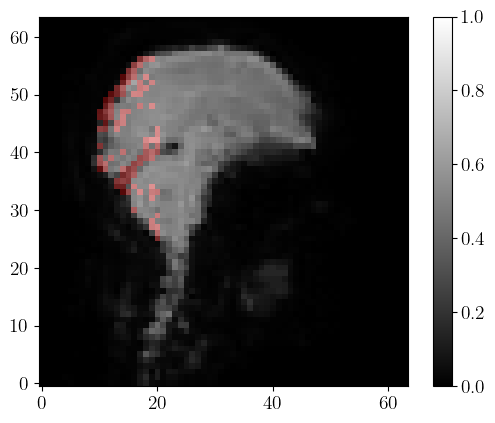

PREDICTED


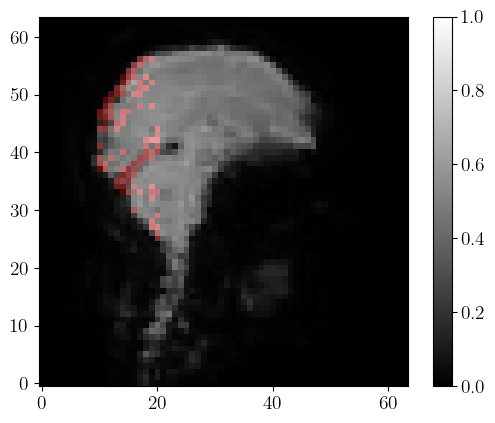

DIFFERENCE


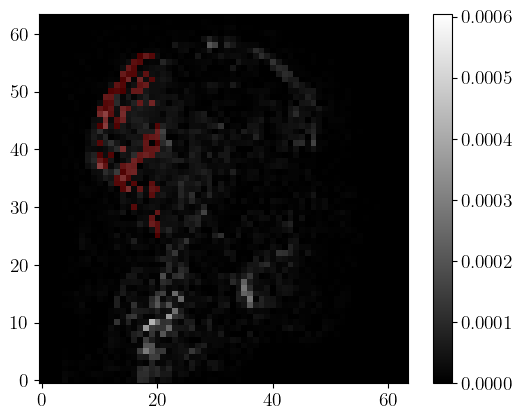

In [ ]:
visualizer.show_scan_slices(37, 0, 20, mask)

Построим график зависимости ошибки от времени задержки только самых изменяющихся вокселях

In [ ]:
# возвращает MSE_test, подсчитанный только на самых изменяющихся вокселях
def evaluate(lindelta: LinearDeltaModel):
    d1, d2, d3 = lindelta._d1, lindelta._d2, lindelta._d3
    mask1 = np.ones((d1, d2, d3))
    mask1.T[:d3//3, :, :] = 0
    mask1.T[:, d2//3:, :] = 0
    mask1 = mask1.reshape(d1*d2*d3)
    delta_voxels = abs(lindelta.deltaY_train).sum(axis=1)
    array = delta_voxels * mask1
    #bound = (delta_voxels * mask1).max() / 2
    #bound = (array[array>0]).max() / 4
    bound = np.quantile(array[array>0], 1 - 1/16)
    mask = array > bound
    difference = lindelta.Y_test_predicted - np.delete(lindelta.Y_test, 0, 1)
    MSE_test = utils.MSE(difference[np.nonzero(mask)])
    return MSE_test

In [ ]:
print(Sub.subs_with_fmri)

['04', '07', '08', '09', '11', '13', '14', '15', '16', '18', '22', '24', '27', '28', '29', '31', '35', '41', '43', '44', '45', '46', '47', '51', '52', '53', '55', '56', '60', '62']


In [ ]:
t = np.linspace(0, 20, 20)

MSE = []
MSE_corrected = []
sub = Sub('47')

for dt in t:
    lindelta = LinearDeltaModel(vector_list, sub, dt, 2, 1000)
    lindelta.fit()
    lindelta.predict()
    lindelta.evaluate()
    MSE.append(lindelta.MSE_test)
    MSE_corrected.append(evaluate(lindelta))

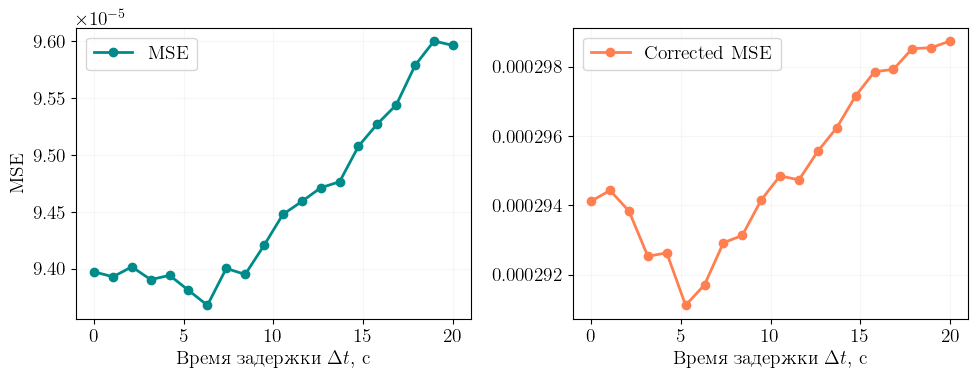

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(t, MSE, marker='o', color="darkcyan", label=r"MSE")
ax[0].set_xlabel("Время задержки $\Delta t$, с")
ax[0].set_ylabel("MSE")
ax[0].legend()
ax[0].grid(alpha=0.1)

ax[1].plot(t, MSE_corrected, marker='o', color="coral", label=r"Corrected MSE")
ax[1].set_xlabel("Время задержки $\Delta t$, с")
#ax[1].set_ylabel("MSE")
ax[1].legend()
ax[1].grid(alpha=0.1)

plt.tight_layout()
plt.savefig("mse_dt.pdf")
plt.show()

In [ ]:
t = np.linspace(0, 10, 20)
MSE_matrix = []
MSE_corrected_matrix = []

for number in Sub.subs_with_fmri:
    MSE = []
    MSE_corrected = []
    sub = Sub(number)
    for dt in t:
        lindelta = LinearDeltaModel(vector_list, sub, dt, 8, 1000)
        lindelta.fit()
        lindelta.predict()
        lindelta.evaluate()
        MSE.append(lindelta.MSE_test)
        MSE_corrected.append(evaluate(lindelta))
    MSE_matrix.append(MSE)
    MSE_corrected_matrix.append(MSE_corrected)

MSE_matrix = np.array(MSE_matrix)
MSE_corrected_matrix = np.array(MSE_corrected_matrix)

In [ ]:
MSE_means = MSE_matrix.mean(axis=0)
MSE_stds = MSE_matrix.std(axis=0)

In [ ]:
MSE_corrected_means = MSE_corrected_matrix.mean(axis=0)
MSE_corrected_stds = MSE_corrected_matrix.std(axis=0)

# Подбор оптимального коэффициента регуляризации

In [130]:
alphas = np.logspace(-3, 8, 12)
MSE_matrix_alpha_8 = []
MSE_matrix_alpha_4 = []
MSE_matrix_alpha_2 = []
MSE_matrix_alpha_1 = []

for number in Sub.subs_with_fmri[:3]:

    MSE_8 = []
    MSE_4 = []
    MSE_2 = []
    MSE_1 = []
    sub = Sub(number)

    for alpha in alphas:

        lindelta = LinearDeltaModel(vector_list, sub, 5, 8, alpha)
        lindelta.fit()
        lindelta.predict()
        lindelta.evaluate()
        MSE_8.append(lindelta.MSE_test)

        lindelta = LinearDeltaModel(vector_list, sub, 5, 4, alpha)
        lindelta.fit()
        lindelta.predict()
        lindelta.evaluate()
        MSE_4.append(lindelta.MSE_test)

        lindelta = LinearDeltaModel(vector_list, sub, 5, 2, alpha)
        lindelta.fit()
        lindelta.predict()
        lindelta.evaluate()
        MSE_2.append(lindelta.MSE_test)

        lindelta = LinearDeltaModel(vector_list, sub, 5, 1, alpha)
        lindelta.fit()
        lindelta.predict()
        lindelta.evaluate()
        MSE_1.append(lindelta.MSE_test)

    MSE_matrix_alpha_8.append(MSE_8)
    MSE_matrix_alpha_4.append(MSE_4)
    MSE_matrix_alpha_2.append(MSE_2)
    MSE_matrix_alpha_1.append(MSE_1)

MSE_matrix_alpha_8 = np.array(MSE_matrix_alpha_8)
MSE_matrix_alpha_4 = np.array(MSE_matrix_alpha_4)
MSE_matrix_alpha_2 = np.array(MSE_matrix_alpha_2)
MSE_matrix_alpha_1 = np.array(MSE_matrix_alpha_1)

In [132]:
path = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), "src", "MSE_alpha.npy")
array = np.array([MSE_matrix_alpha_8, MSE_matrix_alpha_4, MSE_matrix_alpha_2, MSE_matrix_alpha_1], dtype=object)
np.save(path, array, allow_pickle=True)

In [40]:
path = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), "src", "MSE_alpha.npy")
MSE_matrix_alpha_8, MSE_matrix_alpha_4, MSE_matrix_alpha_2, MSE_matrix_alpha_1 = np.load(path, allow_pickle=True)

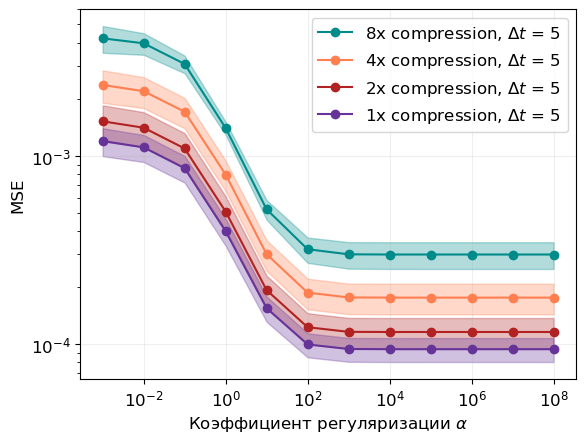

In [43]:
MSE_means_alpha_8 = np.array([vector.mean() for vector in MSE_matrix_alpha_8.T])
MSE_stds_alpha_8 = np.array([vector.std() for vector in MSE_matrix_alpha_8.T])

MSE_means_alpha_4 = np.array([vector.mean() for vector in MSE_matrix_alpha_4.T])
MSE_stds_alpha_4 = np.array([vector.std() for vector in MSE_matrix_alpha_4.T])

MSE_means_alpha_2 = np.array([vector.mean() for vector in MSE_matrix_alpha_2.T])
MSE_stds_alpha_2 = np.array([vector.std() for vector in MSE_matrix_alpha_2.T])

MSE_means_alpha_1 = np.array([vector.mean() for vector in MSE_matrix_alpha_1.T])
MSE_stds_alpha_1 = np.array([vector.std() for vector in MSE_matrix_alpha_1.T])

plt.rcParams.update({'font.size': 12})
plt.rc("font", family='sans-serif')

plt.plot(alphas, MSE_means_alpha_8, marker='o', color="darkcyan", label=r"8x compression, $\Delta t$ = 5")
plt.fill_between(alphas, MSE_means_alpha_8 - MSE_stds_alpha_8, MSE_means_alpha_8 + MSE_stds_alpha_8, color="darkcyan", alpha = 0.3)
plt.plot(alphas, MSE_means_alpha_4, marker='o', color="coral", label=r"4x compression, $\Delta t$ = 5")
plt.fill_between(alphas, MSE_means_alpha_4 - MSE_stds_alpha_4, MSE_means_alpha_4 + MSE_stds_alpha_4, color="coral", alpha = 0.3)
plt.plot(alphas, MSE_means_alpha_2, marker='o', color="firebrick", label=r"2x compression, $\Delta t$ = 5")
plt.fill_between(alphas, MSE_means_alpha_2 - MSE_stds_alpha_2, MSE_means_alpha_2 + MSE_stds_alpha_2, color="firebrick", alpha = 0.3)
plt.plot(alphas, MSE_means_alpha_1, marker='o', color="rebeccapurple", label=r"1x compression, $\Delta t$ = 5")
plt.fill_between(alphas, MSE_means_alpha_1 - MSE_stds_alpha_1, MSE_means_alpha_1 + MSE_stds_alpha_1, color="rebeccapurple", alpha = 0.3)
plt.xlabel("Коэффициент регуляризации $\\alpha$")
plt.ylabel("MSE")
#plt.ylim(0.7 * abs(mse_means - mse_stds).max(), 1.1 * abs(mse_means + mse_stds).max())
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(alpha=0.2)

plt.savefig(os.path.join(figures, "subs_MSE_alpha.pdf"), bbox_inches="tight")

# Анализ распределения весов модели

In [114]:
sub = Sub('04')

In [115]:
lindelta = LinearDeltaModel(vector_list, sub, 5, 1, 1000)
lindelta.fit()

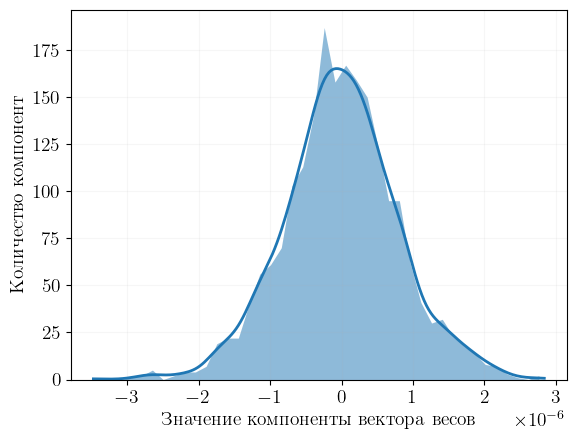

In [117]:
visualizer = Visualizer(lindelta)
visualizer.show_mean_weight_distribution()
plt.savefig("distribution.pdf", bbox_inches="tight")

---

Попробуем проверить нормальность распределения с помощью критерия Шапиро-Уилка

In [62]:
from scipy.stats import shapiro
w_mean = np.mean(lindelta.W, axis=0)
pvalue = shapiro(w_mean)[1]

Достигаемый уровень значимости для нулевой гипотезы "Распределение является нормальным"

In [63]:
print(f'pvalue = {pvalue:.2e}')

pvalue = 1.44e-05


Достигаемый уровень значимости позволяет отвергнуть нулевую гипотезу, т.е. распределение нормалньным не является. Тем не менее, оно не равномерное, поэтому построенная модель прогнозирования согласуется с восприятием видеоряда человеком.

# Гипотеза инвариантности весов модели относительно человека

In [ ]:
sub4 = Sub('04')
sub7 = Sub('07')

In [ ]:
lindelta4 = LinearDeltaModel(vector_list, sub4, 5, 1, 1000)
lindelta7 = LinearDeltaModel(vector_list, sub7, 5, 1, 1000)
mix = LinearDeltaModel(vector_list, sub7, 5, 1, 1000)

In [ ]:
lindelta4.fit()
lindelta4.predict()
lindelta4.evaluate()

lindelta7.fit()
lindelta7.predict()
lindelta7.evaluate()

mix.fit()
mix.predict()
mix.evaluate()

In [ ]:
Y_test_predicted = mix.repredict(lindelta4.W)
MSE_test = mix.evaluate(Y_test_predicted)
MSE_test

9.749764815004539e-05

In [ ]:
print(f"Original MSE_test: {lindelta7.MSE_test}")
print(f"Mixed MSE_test: {MSE_test}")
print(f"Difference: {abs(MSE_test - lindelta7.MSE_test)}")

Original MSE_test: 9.749368716477118e-05
Mixed MSE_test: 9.749764815004539e-05
Difference: 3.96098527420544e-09


In [ ]:
for num in Sub.subs_with_fmri:
    lindelta = LinearDeltaModel(Sub(num), 5, 1, 1000)
    lindelta.fit()
    lindelta.predict()
    lindelta.evaluate()
    utils.save_object(lindelta.W, f"lindelta-W-{num}.pkl")

In [ ]:
# i строка - берется i-ый испытуемый и к нему подмешиваются остальные (используются их матрицы весов)
# j столбец - берется j-ый испытуемый и подмешивается к остальным (используется его матрица весов)
errors = np.zeros((len(Sub.subs_with_fmri), len(Sub.subs_with_fmri)))

In [ ]:
counter = 0
print(f"The process of filling in the error matrix has started [{counter}/{errors.shape[0] * errors.shape[1]}]\n")

for i in range(errors.shape[0]):
    lindelta = LinearDeltaModel(Sub(Sub.subs_with_fmri[i]), 5, 1, 1000)
    lindelta.fit()
    lindelta.predict()
    lindelta.evaluate()
    for j in range(errors.shape[1]):
        if i == j:
            errors[i][j] = lindelta.MSE_test
        else:
            W = utils.load_object(f"lindeltapred-W-{sub.subs_with_fmri[j]}.pkl")
            errors[i][j] = lindelta.repredict(W)
        counter += 1
        print(f"[{counter}/{errors.shape[0] * errors.shape[1]}]: errors[{i}][{j}] = {errors[i][j]}")

The process of filling in the error matrix has started [0/900]

[1/900]: errors[0][0] = 0.00010887398565506218
[2/900]: errors[0][1] = 0.00010900381651686263
[3/900]: errors[0][2] = 0.00010896205656009976
[4/900]: errors[0][3] = 0.00010901835849875455
[5/900]: errors[0][4] = 0.00010894890100517538
[6/900]: errors[0][5] = 0.00010884914759461071
[7/900]: errors[0][6] = 0.00010928295128708832
[8/900]: errors[0][7] = 0.00010923043515144097
[9/900]: errors[0][8] = 0.00010944451477955181
[10/900]: errors[0][9] = 0.0001088782992252496
[11/900]: errors[0][10] = 0.00010879594172283322
[12/900]: errors[0][11] = 0.00010923751300813255
[13/900]: errors[0][12] = 0.00010896583535174628
[14/900]: errors[0][13] = 0.00010914541056324956
[15/900]: errors[0][14] = 0.00010895207686188552
[16/900]: errors[0][15] = 0.00010923700256943652
[17/900]: errors[0][16] = 0.00010912205813469299
[18/900]: errors[0][17] = 0.00010924940076113565
[19/900]: errors[0][18] = 0.00010929122949549549
[20/900]: errors[0][19] =

In [ ]:
utils.save_object(errors, "errors.pkl")

In [ ]:
errors = utils.load_object("errors.pkl")

In [ ]:
# содержит отличие MSE от диагонального элемента в процентах
errors_scaled = ((errors.T / np.array([errors[i][i] for i in range(errors.shape[0])])).T - np.ones((errors.shape[0], errors.shape[0]))) * 100

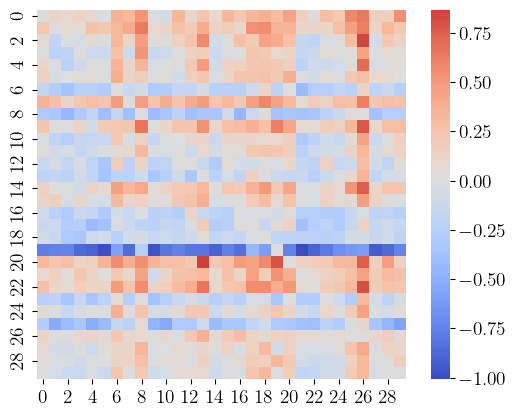

In [ ]:
sns.heatmap(errors_scaled, square=True, center=0, cmap="coolwarm")
plt.savefig("heatmap.pdf", bbox_inches='tight')
plt.show()

# Корректность работы метода

In [64]:
sub35 = Sub('35')

In [65]:
lindelta35 = LinearDeltaModel(vector_list, sub35, 5, 1, 1000)
noised = LinearDeltaModel(vector_list, sub35, 5, 1, 1000)

In [66]:
lindelta35.fit()
lindelta35.predict()
lindelta35.evaluate()

In [67]:
X_random_train = np.random.rand(lindelta35.X_train.shape[0], lindelta35.X_train.shape[1])
X_random_test = np.random.rand(lindelta35.X_test.shape[0], lindelta35.X_test.shape[1])
#X_random_train = np.ones((lindelta35.X_train.shape[0], lindelta35.X_train.shape[1]))
#X_random_test = np.ones((lindelta35.X_test.shape[0], lindelta35.X_test.shape[1]))

In [68]:
noised.deltaY_train_predicted = lindelta35.W @ X_random_train.T
noised.deltaY_test_predicted = lindelta35.W @ X_random_test.T
noised.Y_train_predicted = np.delete(noised.Y_train, -1, 1) + noised.deltaY_train_predicted
noised.Y_test_predicted = np.delete(noised.Y_test, -1, 1) + noised.deltaY_test_predicted
    
noised.MSE_test = noised.evaluate(noised.Y_test_predicted)

In [69]:
lindelta35.MSE_test

0.00015457523719500707

In [70]:
noised.MSE_test

0.0001545439049138533

In [71]:
visualizer35 = Visualizer(lindelta35)
visualizernoised = Visualizer(noised)

TEST


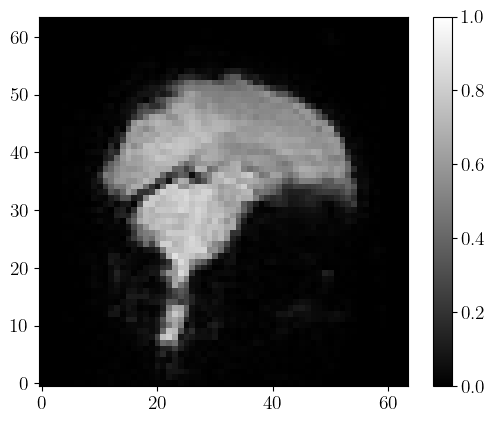

PREDICTED


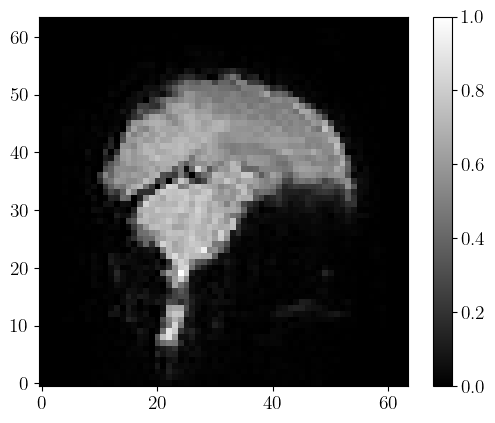

DELTA


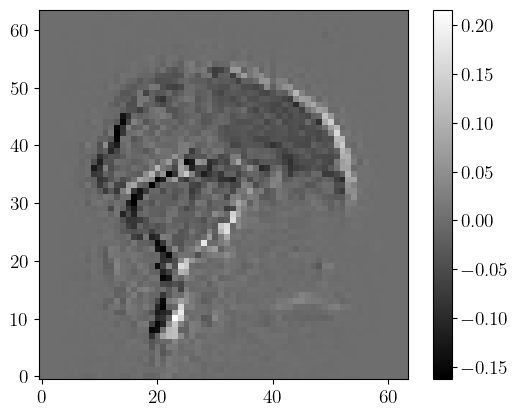

DIFFERENCE


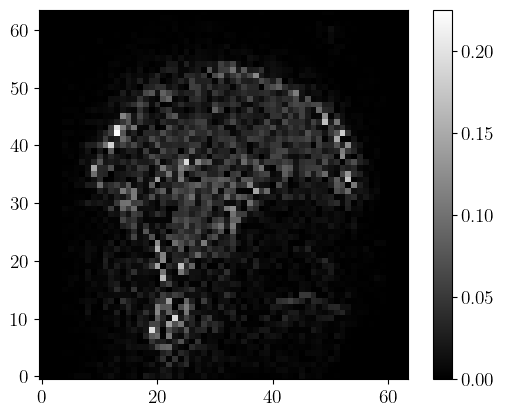

In [72]:
visualizer35.show_recovered_scan_slices(-1, 0, 20)

In [74]:
scan_test = lindelta35.Y_test.T[-1]
scan_predicted = lindelta35.Y_test.T[0] + np.sum(lindelta35.deltaY_test_predicted.T[:-1], axis = 0)

In [75]:
MSE_test = np.linalg.norm(scan_test - scan_predicted) ** 2 / scan_test.shape[0]
MSE_test

0.0004874186244186696

TEST


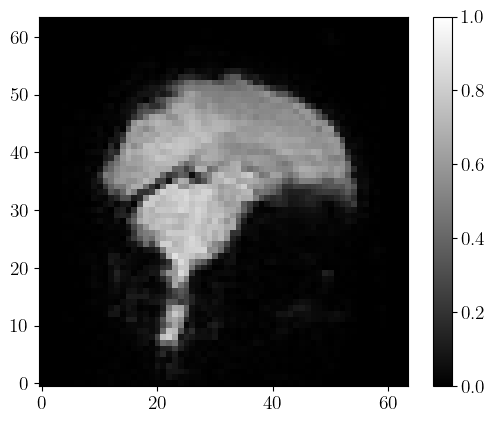

PREDICTED


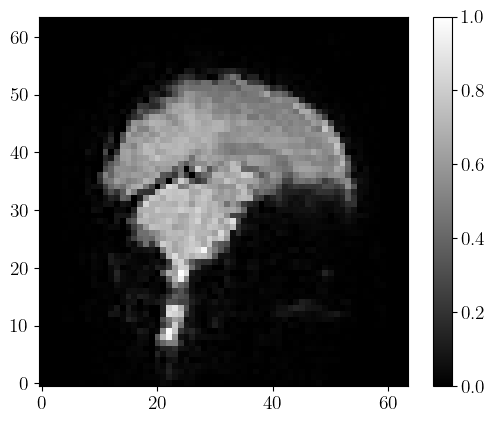

DELTA


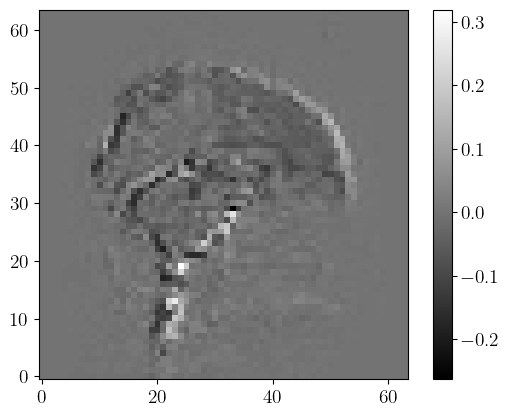

DIFFERENCE


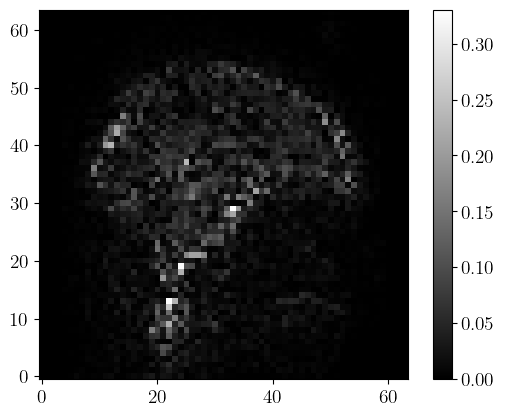

In [73]:
visualizernoised.show_recovered_scan_slices(-1, 0, 20)

In [76]:
scan_test = noised.Y_test.T[-1]
scan_predicted = noised.Y_test.T[0] + np.sum(noised.deltaY_test_predicted.T[:-1], axis = 0)

In [77]:
MSE_test = np.linalg.norm(scan_test - scan_predicted) ** 2 / scan_test.shape[0]
MSE_test

0.0006052453002876153

# Влияние сжатия снимка на время работы метода

In [8]:
import time

times1 = []
times2 = []
times4 = []
times8 = []

In [9]:
for num in Sub.subs_with_fmri:
    sub = Sub(num)
    start_time = time.time()
    lindelta = LinearDeltaModel(vector_list, sub, 5, 8, 1000)
    lindelta.fit()
    end_time = time.time()
    times8.append(end_time - start_time)

In [11]:
for num in Sub.subs_with_fmri:
    sub = Sub(num)
    start_time = time.time()
    lindelta = LinearDeltaModel(vector_list, sub, 5, 4, 1000)
    lindelta.fit()
    end_time = time.time()
    times4.append(end_time - start_time)

In [12]:
for num in Sub.subs_with_fmri:
    sub = Sub(num)
    start_time = time.time()
    lindelta = LinearDeltaModel(vector_list, sub, 5, 2, 1000)
    lindelta.fit()
    end_time = time.time()
    times2.append(end_time - start_time)

In [13]:
for num in Sub.subs_with_fmri:
    sub = Sub(num)
    start_time = time.time()
    lindelta = LinearDeltaModel(vector_list, sub, 5, 1, 1000)
    lindelta.fit()
    end_time = time.time()
    times1.append(end_time - start_time)

In [16]:
times1 = np.array(times1)
times2 = np.array(times2)
times4 = np.array(times4)
times8 = np.array(times8)

In [18]:
times = np.array([times1, times2, times4, times8])

In [23]:
means = times.mean(axis=1)
stds = times.std(axis=1)

In [27]:
coeffs = np.array([1, 2, 4, 8])

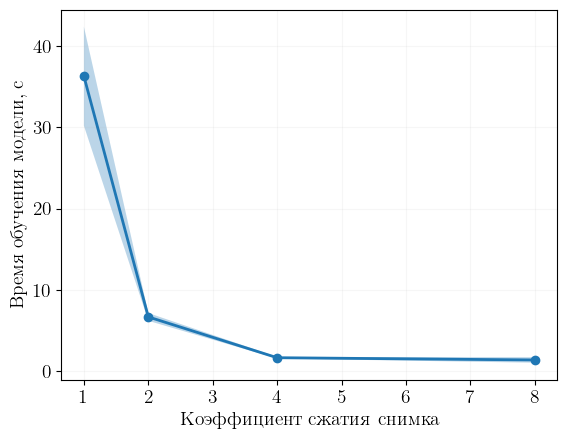

In [39]:
plt.plot(coeffs, means, marker='o')
plt.fill_between(coeffs, means - stds, means + stds, alpha=0.3)
#plt.xticks(ticks=coeffs)
plt.xlabel("Коэффициент сжатия снимка")
plt.ylabel("Время обучения модели, с")
plt.grid(alpha=0.1)
plt.savefig("time_vs_coef.pdf", bbox_inches="tight")
plt.show()

In [42]:
print(f"1x compression: mean = {means[0]:.4f}, std = {stds[0]:.4f}")
print(f"2x compression: mean = {means[1]:.4f}, std = {stds[1]:.4f}")
print(f"4x compression: mean = {means[2]:.4f}, std = {stds[2]:.4f}")
print(f"8x compression: mean = {means[3]:.4f}, std = {stds[3]:.4f}")

1x compression: mean = 36.2909, std = 6.0933
2x compression: mean = 6.6679, std = 0.4795
4x compression: mean = 1.6468, std = 0.1012
8x compression: mean = 1.3704, std = 0.3377


# Кросс-корреляционная функция

С целью экономии времени вычислений будем рассматривать снимки фМРТ с коэффициентом сжатия 4.

In [5]:
sub = Sub('47')
lindelta = LinearDeltaModel(vector_list, sub, 5, 4, 1000)

Первый временной ряд - признаковое описание изображения. Каждое изображение описывается вектором размерности 2048. Всего есть 631 наблюдение.
Временной ряд многомерный. Его размерность 2048. Таким образом, мы смотрим на эволюцию каждой компоненты признакового описания во времени.

In [6]:
ts1 = np.vstack((lindelta.X_train, lindelta.X_test)).T
ts1.shape

(2048, 631)

Второй временной ряд - снимки фМРТ. Каждый из них развернут в вектор размерности 10x16x16 = 2560. Всего 633 наблюдения, так что обрежем первые два, чтобы было одинаковое число. 
Временной ряд многомерный. Его размерность 2560. Таким образом, мы смотрим на эволюцию каждого вокселя во времени.

In [7]:
ts2 = np.hstack((lindelta.Y_train, lindelta.Y_test)).T[2:].T
ts2.shape

(2560, 631)

In [8]:
from scipy.signal import correlate

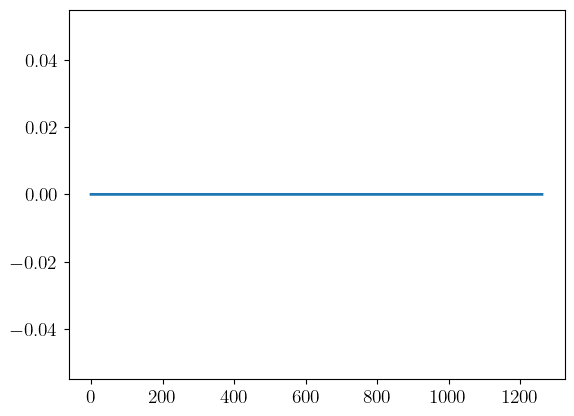

In [44]:
ts1_0 = ts1[0] # первая компонента вектора признакового описания изображения -> как она меняется во времени
ts2_0 = ts2[0] # первый воксель снимка фМРТ -> как он меняется во времени
corr_0_0 = correlate(ts1_0, ts2_0)
plt.plot(corr_0_0)

Корреляция первой компоненты вектора признакового описания изображения со всем снимков фМРТ

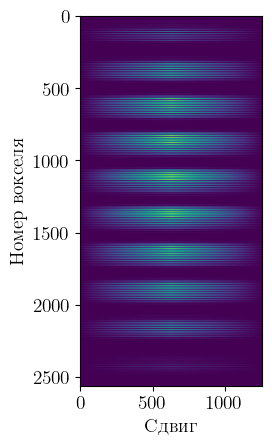

In [36]:
matrix = np.array([correlate(ts1[0], ts2[i]) for i in range(len(ts2))])
plt.imshow(matrix)
plt.xlabel("Сдвиг")
plt.ylabel("Номер вокселя")
plt.show()

Корреляция 307-го вокселя снимка фМРТ со всеми компонентами вектора признакового описания изображения

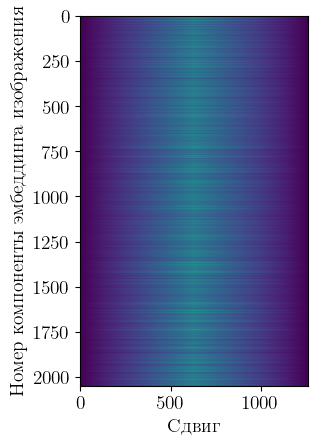

In [11]:
matrix = np.array([correlate(ts1[i], ts2[306]) for i in range(len(ts1))])
plt.imshow(matrix)
plt.xlabel("Сдвиг")
plt.ylabel("Номер компоненты эмбеддинга изображения")
plt.show()

Получим итоговый тензор с кросс-корреляциями

In [12]:
tensor = np.array([[correlate(ts1[j], ts2[i]) for j in range(len(ts1))] for i in range(len(ts2))])

P.S. не получим, он в память не помещается.
Так что напишем функцию, чтобы визуализировать кросс-корреляцию.

In [20]:
def cross_correlation(images, scans, n_component=None, n_voxel=None):
    if n_component is not None and n_voxel is not None:
        return correlate(images[n_component], scans[n_voxel])
    elif n_component is not None and n_voxel is None:
        matrix = np.array([correlate(ts1[n_component], ts2[i]) for i in range(len(ts2))])
        plt.imshow(matrix)
        plt.xlabel("Сдвиг")
        plt.ylabel("Номер вокселя")
        plt.show()
    elif n_component is None and n_voxel is not None:
        matrix = np.array([correlate(ts1[i], ts2[n_voxel]) for i in range(len(ts1))])
        plt.imshow(matrix)
        plt.xlabel("Сдвиг")
        plt.ylabel("Номер компоненты эмбеддинга изображения")
        plt.show()
    else:
        raise ValueError("Необходимо указать номер компоненты и/или номер вокселя!")

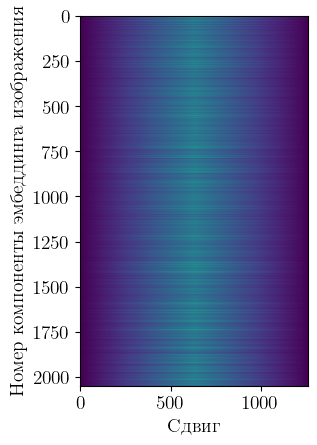

In [52]:
cross_correlation(ts1, ts2, n_voxel=400)